## Inferenz für die Standardabweichung der Grundgesamtheit
----------------------------------------

Bisher haben wir Methoden der Inferenzstatistik erörtert, die sich auf Aussagen über einen oder mehrere Grundgesamtheitsmittelwerte konzentrieren. In den folgenden Abschnitten betrachten wir Methoden der Inferenzstatistik, die Aussagen über die Varianzen (oder Standardabweichungen) der Grundgesamtheit liefern. Wir erinnern daran, dass die Varianz ($\sigma^2$) und die Standardabweichung ($\sigma$) ein Maß für die Streuung und Variabilität einer Variablen sind.

In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]

---------------------------------
Python interpreter: /home/imarevic/Documents/teaching/SRH/content/statistik/statistik-env/bin/python3


## Inferenz für die Standardabweichung einer Grundgesamtheit
----------------------------------------

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
import statsmodels.api as smi

Inferenz für eine Grundgesamtheitsstandardabweichung basiert auf der <a href="https://de.wikipedia.org/wiki/Chi-Quadrat-Verteilung">Chi-Quadrat ($\chi^2$)-Verteilung</a>. Eine $\chi^2$-Verteilung ist eine rechtsschiefe Wahrscheinlichkeitsdichtekurve. Die Form der $\chi^2$-Kurve wird durch ihre Freiheitsgrade ($df$) bestimmt.

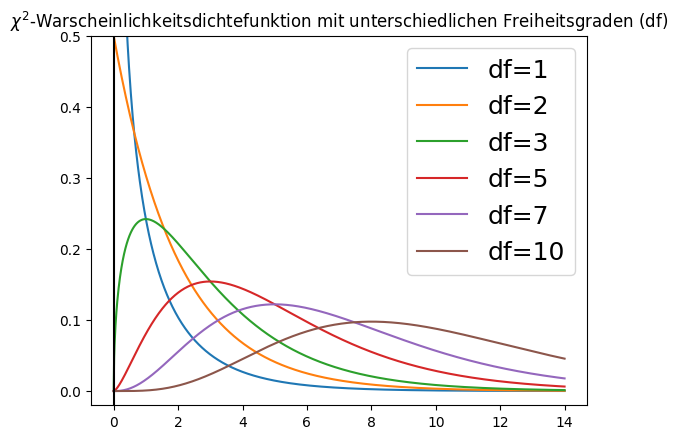

In [3]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

df = [1, 2, 3, 5, 7, 10]

x = np.linspace(0, 14, 1000)
fig, ax = plt.subplots()
for _df in df:
    ax.plot(x, chi2.pdf(x, df=_df), label=f"df={_df}")
ax.set_title(
    "$\chi^2$-Warscheinlichkeitsdichtefunktion mit unterschiedlichen Freiheitsgraden (df)"
)
ax.legend(fontsize=18)
ax.set_ylim(-0.02, 0.5)
ax.axvline(0, color="k")

Um einen Hypothesentest für eine Populationsstandardabweichung durchzuführen, wird ein $\chi^2$-Wert mit einer bestimmten Fläche unter einer $\chi^2$-Kurve in Beziehung gesetzt. Entweder wir ziehen eine $\chi^2$-Tabelle, um diesen Wert nachzuschlagen, oder wir machen von der Python-Maschinerie Gebrauch.

Bei gegebenen $\alpha$, wobei $\alpha$ einer Wahrscheinlichkeit zwischen $0$ und $1$ entspricht, bezeichnet $\chi^2_\alpha$ den $\chi^2$ -Wert, der die Fläche $\alpha$ zu seiner Rechten unter einer $\chi^2$ -Kurve hat.

Text(2.5, 0.07, 'Fläche = $1 - \\alpha$')

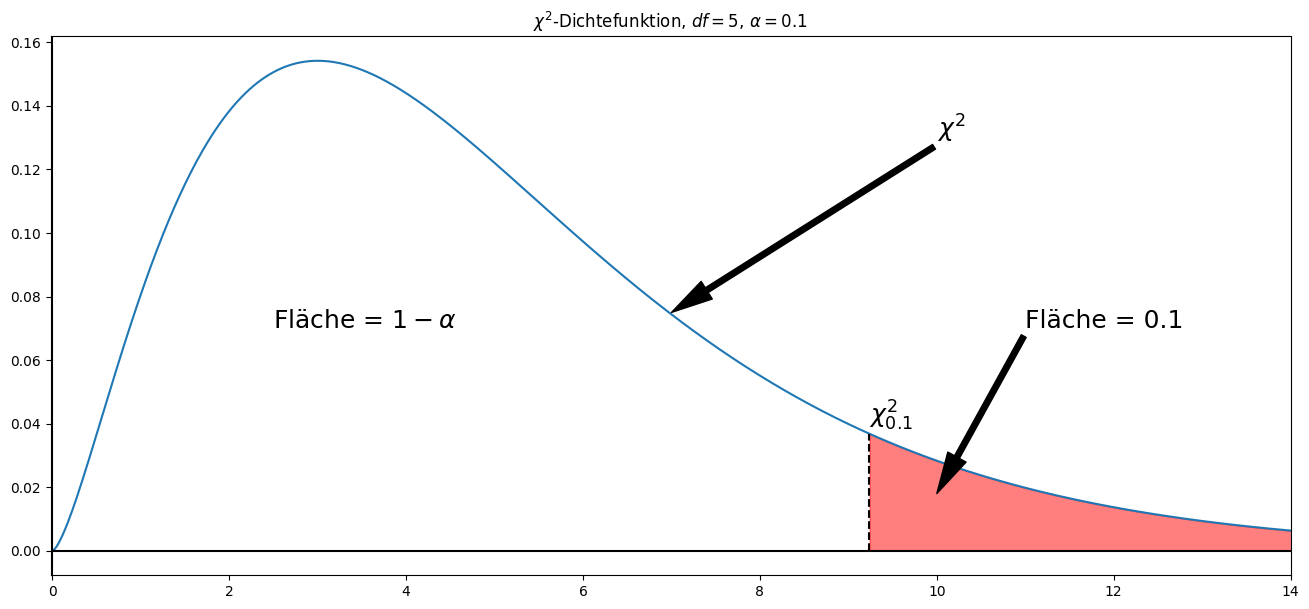

In [4]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

df = 5
alpha = 0.9
x = np.linspace(0, 16, 1000)
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(x, chi2.pdf(x, df=df))
ax.set_xlim(-0.02, 14)
ax.axvline(0, color="k")
ax.axhline(0, color="k")
ax.vlines(
    chi2.ppf(alpha, df=df),
    ymin=0,
    ymax=chi2.pdf(chi2.ppf(alpha, df=df), df=df),
    color="k",
    linestyle="dashed",
)

ax.fill_between(
    x, chi2.pdf(x, df=df), where=x >= chi2.ppf(alpha, df=df), color="r", alpha=0.5
)

ax.set_title(r"$\chi^2$-Dichtefunktion, $df=5$, $\alpha=0.1$")


ax.annotate(
    r"$\chi^2$",
    xy=(7, 0.075),
    xytext=(10, 0.13),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=18,
)

ax.annotate(
    r"Fläche = 0.1",
    xy=(10, 0.018),
    xytext=(11, 0.07),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=18,
)

ax.text(s="$\chi^2_{0.1}$", x=chi2.ppf(alpha, df=df), y=0.04, size=18)
ax.text(s=r"Fläche = $1 - \alpha$", x=2.5, y=0.07, size=18)

### Intervall-Schätzung von $\sigma$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\sigma$ beträgt

$$\sqrt{\frac{n-1}{\chi^2_{\alpha/2}}} \le \sigma \le \sqrt{\frac{n-1}{\chi^2_{1-\alpha/2}} }$$

### $\chi^2$-Test auf Standardabweichung

Das Hypothesentestverfahren für eine Standardabweichung wird als **$\chi^2$-Test auf Standardabweichung** bezeichnet. Hypothesentests für Varianzen folgen demselben schrittweisen Verfahren wie Hypothesentests für den Mittelwert. 

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn }p \le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}
$$

Die Teststatistik für einen Hypothesentest mit der Nullhypothese $H_0: \,\sigma = \sigma_0$ für eine normalverteilte Variable ist gegeben durch

$$\chi^2 = \frac{n-1}{\sigma^2_0}s^2$$

wobei $n$ der Stichprobenumfang und $s$ die Standardabweichung der Stichprobendaten ist.

Die Variable folgt einer $\chi^2$-Verteilung mit $n-1$ Freiheitsgraden.

Beachten Sie, dass der Test auf eine Standardabweichung $\chi^2$-Test nicht robust gegenüber Abweichungen von der Normalverteilung ist (Weiss 2010).

### $\chi^2$ -Test auf Standardabweichung : Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den $\chi^2$-Test mit einer Standardabweichung in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [5]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary.*

Um den **$\chi^2$-Test auf Standardabweichung** zu demonstrieren, untersuchen wir die Streuung der Körpergröße in cm der Studentinnen und vergleichen sie mit der Streuung der Körpergröße aller Studenten (unserer Grundgesamtheit). **Wir wollen testen, ob die Standardabweichung der Körpergröße der Studentinnen kleiner ist als die Standardabweichung der Körpergröße aller Studenten.**

### Vorbereitung der Daten

Wir beginnen mit der Datenaufbereitung.

- Zunächst definieren wir die Standardabweichung der Grundgesamtheit. In unserem Beispiel entspricht die Grundgesamtheit der Körpergröße aller $8239$ Studenten im Datensatz. Wir berechnen die Standardabweichung für die Variable `height` und weisen ihr den Variablennamen `sigma0` zu.
- Zweitens unterteilen wir den Datensatz anhand der Variable `gender`.
- Drittens nehmen wir eine Stichprobe von $30$ Studentinnen und extrahieren die interessierende Statistik, die Standardabweichung der Größe der Studentinnen in unserer Stichprobe.

In [6]:
sigma0 = students["height"].std()
sigma0

np.float64(11.077529134763823)

Die Standardabweichung der interessierenden Grundgesamtheit ($\sigma_0$) beträgt $\approx$ $11,08$ cm.

In [7]:
female = students.loc[students["gender"] == "Female"]

n = 30
female_sample = female["height"].sample(n=30, random_state=1)
sample_std = female_sample.std()

Außerdem überprüfen wir die Normalverteilungsannahme, indem wir ein <a href="https://de.wikipedia.org/wiki/Quantil-Quantil-Diagramm">Q-Q-Diagramm</a> erstellen. In Python können wir die Funktion `qqplot()` verwenden, um Q-Q-Plots zu erstellen.

Text(0, 0.5, 'Stichproben Quantillen')

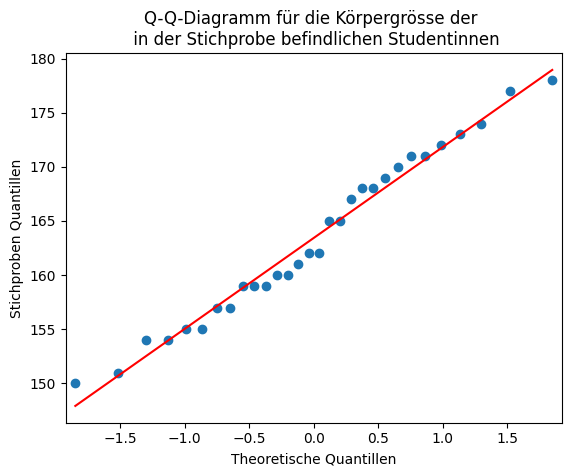

In [8]:
# Erzeuge Q-Q Plot
qqp = smi.qqplot(female_sample, line="r")
ax = qqp.gca()
ax.set_title(
    "Q-Q-Diagramm für die Körpergrösse der \n in der Stichprobe befindlichen Studentinnen"
)
ax.set_xlabel("Theoretische Quantillen")
ax.set_ylabel("Stichproben Quantillen")

Wir sehen, dass die Daten ungefähr auf einer Geraden liegen. Auf der Grundlage des grafischen Auswertungsansatzes kommen wir zu dem Schluss, dass die interessierende Variable ungefähr normalverteilt ist.

### Überprüfung der Hypothesen

Zur Durchführung des **$\chi^2$-Tests auf Standardabweichung** folgen wir dem Verfahren der schrittweisen Durchführung von Hypothesentests.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass die Standardabweichung der Körpergröße der Studentinnen ($\sigma$) gleich der Standardabweichung der Grundgesamtheit ($\sigma_0 \approx 11,08$ cm) ist.

$$H_0: \quad \sigma = \sigma_0$$

**Alternative Hypothese**

$$H_A: \quad \sigma < \sigma_0$$

Diese Formulierung führt zu einem linksseitigen Hypothesentest.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,05$$

In [9]:
alpha = 0.05

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die Gleichung für die Teststatistik von oben:

$$\chi^2 = \frac{n-1}{\sigma^2_0}s^2$$

In [10]:
# Berechne Teststatistik
n = len(female_sample)
s_2 = np.var(female_sample, ddof=1)
sigma0_2 = np.var(students["height"], ddof=1)
x2 = ((n - 1) / sigma0_2) * s_2
x2

np.float64(14.272211660048107)

Der numerische Wert der Teststatistik ist $14,27221166$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `chi2.ppf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet:

$$df=n-1$$

In [11]:
# Berechne df
df = n - 1

# Berechne p-Wert
p = chi2.cdf(x2, df=df)
p

np.float64(0.010089951471801363)

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [12]:
p <= alpha

np.True_

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,05$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $5 \%$-Niveau und liefern starke Beweise gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=0,01008995$. Bei einem Signifikanzniveau von $5 \%$ lassen die Daten den Schluss zu, dass die Standardabweichung der Körpergröße von Studentinnen weniger als $11$ cm beträgt.

### Hypothesentests in Python

Wir haben gerade einen $\chi^2$-Test mit einer Standardabweichung in Python manuell durchgeführt. Meines Wissens bietet Python keine eingebaute Funktion zur Berechnung eines Standardabweichung $\chi^2$-Test. Wir können jedoch eine solche Funktion selbst implementieren. Unsere Funktion `simple_chi2_test()` nimmt als Eingabe einen Stichprobenvektor `x`, die Standardabweichung der Grundgesamtheit `sigma0`, das Signifikanzniveau `alpha` und die angegebene Methode, `right`, `left` und `two-sided`.

In [13]:
def simple_chi2_test(x, sigma0, alpha, method="two-sided"):
    df = len(x) - 1
    v = np.var(x, ddof=1)
    # Berechne Teststatistik
    testchi = df / (sigma0**2) * v

    # linksseitiger Test
    if method == "left":
        p = chi2.cdf(x=testchi, df=df)
    # rechtsseitiger Test
    elif method == "right":
        p = 1 - chi2.cdf(x=testchi, df=df)

    # beidseitiger Test (default)
    else:
        p_upper = 1 - chi2.cdf(x=testchi, df=df)
        p_lower = chi2.cdf(x=testchi, df=df)
        if p_upper * 2 > 1:
            p = p_lower * 2
        else:
            p = p_upper * 2
    # evaluiere p < alpha
    if p < alpha:
        reject = True
    else:
        reject = False

    # Ausgabe
    print("Significance level:", alpha)
    print("Degrees of freedom:", df)
    print("Test statistic:", round(testchi, 4))
    print("p-value:", p)
    print("Reject H0:", reject)

Wenden wir nun unsere selbst erstellte Funktion `simple_x2_test()` auf die obigen Beispieldaten an.

In [14]:
simple_chi2_test(x=female_sample, sigma0=sigma0, alpha=0.05, method="left")

Significance level: 0.05
Degrees of freedom: 29
Test statistic: 14.2722
p-value: 0.010089951471801363
Reject H0: True


Perfekt! Vergleichen Sie die Ausgabe der Funktion `simple_chi2_test()` mit unserem Ergebnis von oben. Auch hier können wir zu dem Schluss kommen, dass die Daten bei einem Signifikanzniveau von $5 \%$ starke Anhaltspunkte dafür liefern, dass die Standardabweichung der Körpergröße von Studentinnen weniger als $11$ cm beträgt.

In [15]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black

---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]

---------------------------------
Python interpreter: /home/imarevic/Documents/teaching/SRH/content/statistik/statistik-env/bin/python3


<Figure size 640x480 with 0 Axes>

## Inferenz für Standardabweichungen zweier Grundgesamtheiten
----------------------------------------

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import f
import statsmodels.api as smi

In diesem Abschnitt werden Hypothesentests für die Standardabweichungen zweier Grundgesamtheiten behandelt. Oder anders ausgedrückt, wir erörtern Methoden der Inferenz für die Standardabweichungen einer Variablen aus zwei verschiedenen Grundgesamtheiten. Diese Methoden beruhen auf der <a href="https://de.wikipedia.org/wiki/F-Verteilung">$F$-Verteilung</a>, benannt zu Ehren von <a href="https://de.wikipedia.org/wiki/Ronald_Aylmer_Fisher">Sir Ronald Aylmer Fisher</a>.

Die $F$-Verteilung ist eine rechtsschiefe Wahrscheinlichkeitsdichteverteilung mit zwei Formparametern, $v_1$ und $v_2$, den Freiheitsgraden für den Zähler ($v_1$) und den Freiheitsgraden für den Nenner ($v_2$).

$$df = (v_1,v_2)$$

Wie bei jeder anderen Dichtekurve entspricht die Fläche unter der Kurve der $F$-Verteilung den Wahrscheinlichkeiten. Die Fläche unter der Kurve und damit die Wahrscheinlichkeit für ein gegebenes Intervall und einen gegebenen $df$-Wert wird mittels Software berechnet. Alternativ kann man sie auch in einer <a href="https://www.itl.nist.gov/div898/handbook/eda/section3/eda3673.htm">Tabelle</a> nachschlagen. In diesen Tabellen werden im Allgemeinen die Freiheitsgrade für den Zähler ($v_1$) am oberen Rand angezeigt, während die Freiheitsgrade für den Nenner ($v_2$) in den äußeren Spalten auf der linken Seite angezeigt werden.

Um einen Hypothesentest für zwei Grundgesamtheitsstandardabweichungen durchzuführen, wird der Wert berechnet, der einer bestimmten Fläche unter einer $F$-Kurve entspricht, berechnet.

Für gegebenes $\alpha$,wobei $\alpha$ einer Wahrscheinlichkeit zwischen $0$ und $1$ entspricht, bezeichnet $F_\alpha$ den Wert, der eine Fläche $\alpha$ zu seiner Rechten unter einer $F$-Kurve hat.

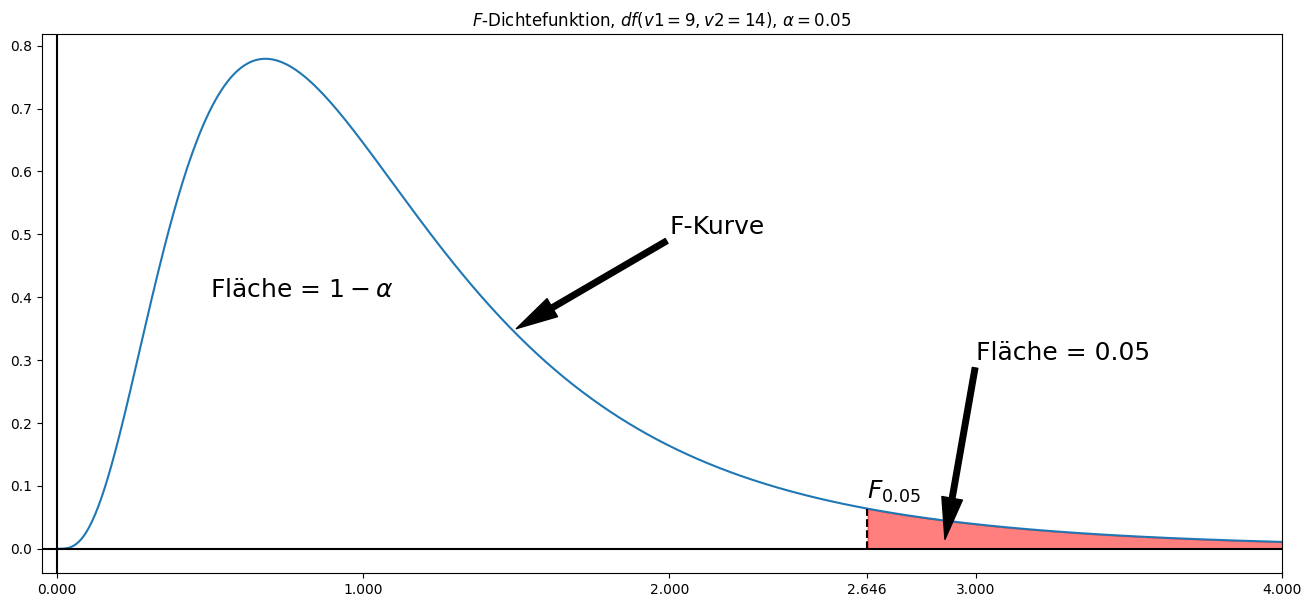

In [17]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

v1 = 9
v2 = 14
alpha = 0.95
x = np.linspace(0, 5, 1000)
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(x, f.pdf(x, v1, v2))
ax.set_xlim(-0.05, 4)
ax.axvline(0, color="k")
ax.axhline(0, color="k")
ax.vlines(
    f.ppf(alpha, v1, v2),
    ymin=0,
    ymax=f.pdf(f.ppf(alpha, v1, v2), v1, v2),
    color="k",
    linestyle="dashed",
)

ax.fill_between(
    x, f.pdf(x, v1, v2), where=x >= f.ppf(alpha, v1, v2), color="r", alpha=0.5
)

ax.set_title(r"$F$-Dichtefunktion, $df(v1=9, v2=14)$, $\alpha=0.05$")


ax.annotate(
    r"F-Kurve",
    xy=(1.5, 0.35),
    xytext=(2, 0.5),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=18,
)

ax.annotate(
    r"Fläche = 0.05",
    xy=(2.9, 0.015),
    xytext=(3, 0.3),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=18,
)

ax.text(s="$F_{0.05}$", x=f.ppf(alpha, v1, v2), y=0.08, size=18)
ax.text(s=r"Fläche = $1 - \alpha$", x=0.5, y=0.4, size=18)

ticks = [0, 1, 2, f.ppf(alpha, v1, v2), 3, 4]
ax.set_xticks(ticks)

In der obigen Abbildung ergibt $F_{0,05}$ für $df=(9,14)$ den Wert $\approx 2,6458$.

Eine interessante Eigenschaft von $F$-Kurven ist die **reziproke Charakteristik**. Sie besagt, dass für eine $F$-Kurve mit $df=(v_1,v_2)$ der $F$-Wert mit der Fläche $\alpha$ auf der linken Seite gleich dem Kehrwert des $F$-Wertes mit der Fläche $\alpha$ auf der rechten Seite für eine $F$-Kurve mit $df=(v_2,v_1)$ ist ({cite:t}`fahrmeirstatistik` s.282). Übertragen auf das obige Beispiel, bei dem $F_{0,05}$ für $df=(9,14) \approx 2,6458$ beträgt, bedeutet dies, dass $F_{0,95}$ für $df=(14,9) \ ; \  \frac{1}{2,6458}=0,378$ beträgt.

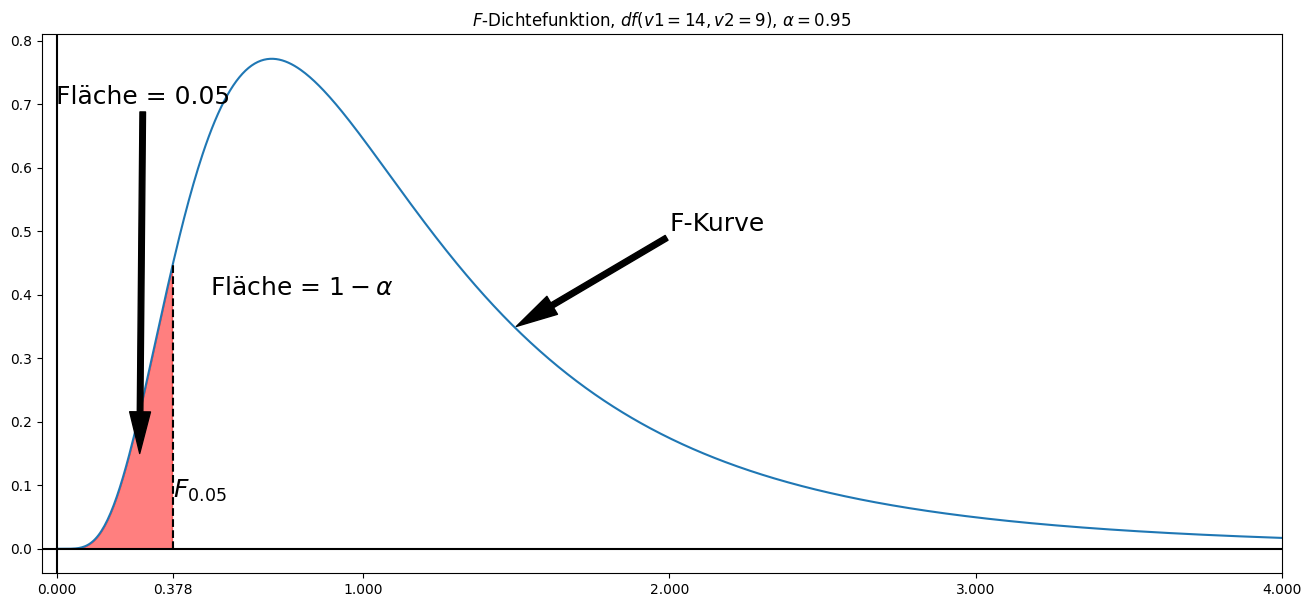

In [18]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

v1 = 14
v2 = 9
alpha = 0.05
x = np.linspace(0, 5, 1000)
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(x, f.pdf(x, v1, v2))
ax.set_xlim(-0.05, 4)
ax.axvline(0, color="k")
ax.axhline(0, color="k")
ax.vlines(
    f.ppf(alpha, v1, v2),
    ymin=0,
    ymax=f.pdf(f.ppf(alpha, v1, v2), v1, v2),
    color="k",
    linestyle="dashed",
)

ax.fill_between(
    x, f.pdf(x, v1, v2), where=x <= f.ppf(alpha, v1, v2), color="r", alpha=0.5
)

ax.set_title(r"$F$-Dichtefunktion, $df(v1=14, v2=9)$, $\alpha=0.95$")


ax.annotate(
    r"F-Kurve",
    xy=(1.5, 0.35),
    xytext=(2, 0.5),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=18,
)

ax.annotate(
    r"Fläche = 0.05",
    xy=(0.27, 0.15),
    xytext=(0.28, 0.7),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=18,
    horizontalalignment="center",
)

ax.text(s="$F_{0.05}$", x=f.ppf(alpha, v1, v2), y=0.08, size=18)
ax.text(s=r"Fläche = $1 - \alpha$", x=0.5, y=0.4, size=18)

ticks = [0, 1, 2, f.ppf(alpha, v1, v2), 3, 4]
ax.set_xticks(ticks)

### Intervall-Schätzung von $\sigma_1-\sigma_2$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\sigma$ beträgt

$$\frac{1}{\sqrt{F_{\alpha /2}}} \times \frac{s_1}{s_2} \le \sigma \le \frac{1}{\sqrt{F_{1-\alpha /2}}} \times \frac{s_1}{s_2}\text{,}$$

wobei $s_1$ und $s_2$ die Standardabweichungen der Stichprobe sind.

### $F$-Test für zwei Standardabweichungen

Das Hypothesentestverfahren für die Standardabweichung wird als F-Test für zwei Standardabweichungen bezeichnet. Der Hypothesentest für zwei Standardabweichungen der Grundgesamtheit folgt demselben schrittweisen Verfahren wie andere Hypothesentests.

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn }p \le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}
$$

Die Teststatistik für einen Hypothesentest für eine normalverteilte Variable und für unabhängige Stichproben der Größen $n_1$ und $n_2$ ist gegeben durch

$$F = \frac{s_1^2/\sigma_1^2}{s_2^2/\sigma_2^2}\text{,}$$

mit $df=(n_1-1,n_2-1)$.

Wenn $H_0: \sigma_1 = \sigma_2$ wahr ist, dann vereinfacht sich die Gleichung zu

$$F = \frac{s_1^2}{s_2^2}$$

### $F$-Test für zwei Standardabweichungen : Ein Beispiel

Um einige praktische Erfahrungen zu sammeln, wenden wir den **$F$-Test für zwei Standardabweichungen** in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [19]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary.*

Um den **$F$-Test für zwei Standardabweichungen** zu zeigen, untersuchen wir die Streuung der Körpergröße in cm der Studentinnen und vergleichen sie mit der Streuung der Körpergröße aller Studenten (unserer Grundgesamtheit). **Wir wollen testen, ob sich die Standardabweichung der Körpergröße der weiblichen Studenten ($\sigma_1$) von der Standardabweichung der Körpergröße der männlichen Studenten ($\sigma_2$) unterscheidet**.

### Vorbereitung der Daten


-    Wir unterteilen den Datensatz anhand der Variable `gender`.
-    Dann nehmen wir $25$ weibliche und $25$ männliche Studenten in die Stichprobe auf.
-    Dann berechnen wir die Standardabweichungen der interessierenden Variable (Körpergröße in cm) für beide Stichproben und weisen ihnen die Variablen `std_female` und `std_male` zu.

In [20]:
# Unterteile Datensatz nach Variable `gender`
male = students.loc[students["gender"] == "Male"]
female = students.loc[students["gender"] == "Female"]

# Entnehme Probe von jeweils 25 Studenten
n = 25
male_sample = male["height"].sample(n=25, random_state=1)
female_sample = female["height"].sample(n=25, random_state=1)

In [21]:
std_female = np.std(female_sample, ddof=1)
std_female

np.float64(7.009041779492163)

In [22]:
std_male = np.std(male_sample, ddof=1)
std_male

np.float64(8.203251387915241)

Außerdem überprüfen wir die Normalverteilungsannahme, indem wir ein <a href="https://de.wikipedia.org/wiki/Quantil-Quantil-Diagramm">Q-Q-Diagramm</a> erstellen. In Python können wir die Funktion `qqplot()` verwenden, um Q-Q-Plots zu erstellen.

Text(0, 0.5, 'Stichproben Quantillen')

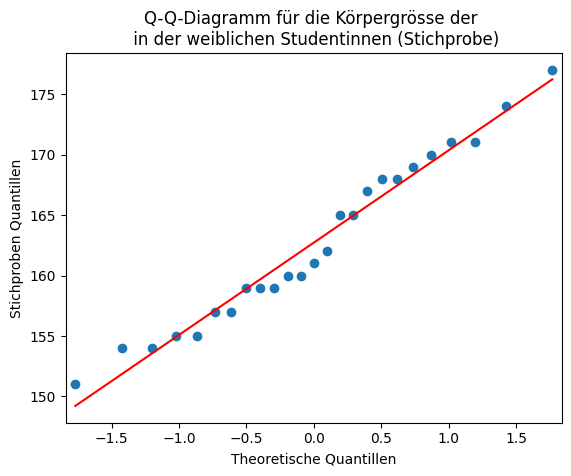

In [23]:
# Erzeuge Q-Q Plot
qqp = smi.qqplot(female_sample, line="r")
ax = qqp.gca()
ax.set_title(
    "Q-Q-Diagramm für die Körpergrösse der \n in der weiblichen Studentinnen (Stichprobe)"
)
ax.set_xlabel("Theoretische Quantillen")
ax.set_ylabel("Stichproben Quantillen")

Text(0, 0.5, 'Stichproben Quantillen')

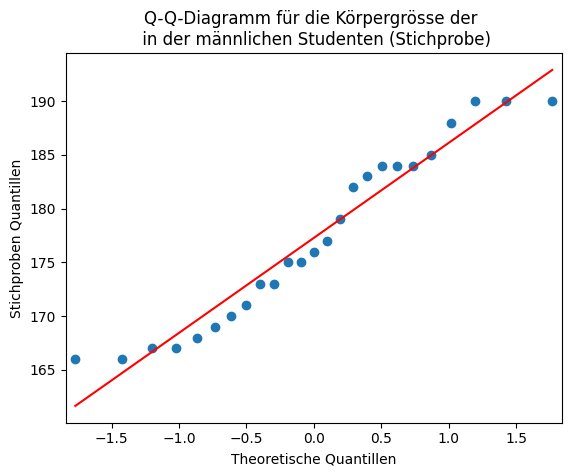

In [24]:
# Erzeuge Q-Q Plot
qqp = smi.qqplot(male_sample, line="r")
ax = qqp.gca()
ax.set_title(
    "Q-Q-Diagramm für die Körpergrösse der \n in der männlichen Studenten (Stichprobe)"
)
ax.set_xlabel("Theoretische Quantillen")
ax.set_ylabel("Stichproben Quantillen")

Wir sehen, dass die Daten ungefähr auf einer Geraden liegen. Auf der Grundlage des grafischen Auswertungsansatzes kommen wir zu dem Schluss, dass die interessierende Variable ungefähr normalverteilt ist.

### Überprüfung der Hypothesen

Zur Durchführung des **$F$-Tests für zwei Standardabweichungen** folgen wir dem Verfahren der schrittweisen Durchführung von Hypothesentests.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass die Standardabweichung der Körpergröße der weiblichen Studenten ($\sigma_1$) gleich der Standardabweichung der Körpergröße der männlichen Studenten ($\sigma_2$) ist.

$$H_0: \quad \sigma_1 = \sigma_2$$

**Alternative Hypothese**

$$H_A: \quad \sigma_1 \ne \sigma_2$$

Diese Formulierung führt zu einem zweiseitigen Hypothesentest.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,05$$

In [25]:
alpha = 0.05

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die Gleichung für die Teststatistik von oben:

$$F = \frac{s_1^2}{s_2^2}$$

In [26]:
# Berechne die Teststatistik
Ftest = std_female**2 / std_male**2
Ftest

np.float64(0.7300376461264116)

Der numerische Wert der Teststatistik beträgt $\approx 0,73$.

Um den p-Wert zu erhalten, wenden wir die Funktion `f.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet.

$$df = (n_1 - 1, n_2 - 1)$$

In [27]:
# Berechne df
df1 = len(female_sample) - 1
df2 = len(male_sample) - 1

Den p-Wert berechnen wir nun mit Hilfe der `f.cdf()` Funktion und bilden davon die **Survival Funktion** `1 - f.cdf()`. Dies entsprich einem Vergleich gegenüber der linken Seite der F-Verteilung.

In [28]:
p = 1 - f.cdf(Ftest, df1, df2)
print(f"p-value: {p}")
print(f"Sig. result: {p<alpha}")

p-value: 0.7767376526940193
Sig. result: False


**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [29]:
p <= alpha

np.False_

Der $p$-Wert ist größer als das angegebene Signifikanzniveau von $0,05$; wir verwerfen $H_0$ nicht. Die Testergebnisse sind auf dem $5 \%$-Niveau statistisch signifikant und liefern keinen ausreichenden Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=0,77673765$. Bei einem Signifikanzniveau von $5 \%$ liefern die Daten keine ausreichenden Beweise für die Schlussfolgerung, dass die Standardabweichungen der Körpergröße von weiblichen und männlichen Studenten unterschiedlich sind.

### Hypothesentests in Python

Wir haben gerade einen $F$-Test für zwei Standardabweichungen in Python manuell durchgeführt. OK, wir haben eine Menge gelernt, aber jetzt nutzen wir die Mittel von Python, um das gleiche Ergebnis wie oben mit nur einer Zeile Code zu erhalten!

Um einen $F$-Test für zwei Standardabweichungen  in Python durchzuführen, verwenden wir unsere Funktion `simple_x2_test()` und verändern sie geringfügig. Wir geben zwei Vektoren als Dateneingabe an: `female_sample` und `male_sample`. Das Argument `alternative` muss nicht angegeben werden, da `alternative = 'two-sided'` die Vorgabe ist.

In [30]:
def simple_f_test(x, y, dfn, dfd, alpha, method="two-sided"):
    df1 = len(female_sample) - 1
    df2 = len(male_sample) - 1
    std_male = np.std(male_sample, ddof=1)
    std_female = np.std(female_sample, ddof=1)
    # Berechne Teststatistik
    Ftest = std_female**2 / std_male**2

    # linksseitiger Test
    if method == "left":
        p = scipy.stats.f.cdf(x=Ftest, dfn=df1, dfd=df2)
    # rechtsseitiger Test
    elif method == "right":
        p = 1 - scipy.stats.f.cdf(x=Ftest, dfn=df1, dfd=df2)

    # beidseitiger Test (default)
    else:
        p_lower = 1 - f.cdf(Ftest, dfn=df1, dfd=df2)
        p_upper = f.cdf(Ftest, dfn=df1, dfd=df2)
        p = p_lower

    # evaluiere p < alpha
    if (p_lower < alpha) & (p_upper > (1 - alpha)):
        reject = True
    else:
        reject = False

    # Ausgabe
    print("Significance level:", alpha)
    print("Degrees of freedom:", df1, df2)
    print("Test statistic:", round(Ftest, 4))
    print("p-value:", p)
    print("Reject H0:", reject)

In [31]:
simple_f_test(female_sample, male_sample, df1, df2, alpha=alpha)

Significance level: 0.05
Degrees of freedom: 24 24
Test statistic: 0.73
p-value: 0.7767376526940193
Reject H0: False


Es hat gut funktioniert! Vergleichen Sie die Ausgabe der Funktion `simple_f_test()` mit unserem Ergebnis von oben. Auch hier können wir zu dem Schluss kommen, dass die Daten bei einem Signifikanzniveau von $5 \%$ keine ausreichenden Beweise dafür liefern, dass die Standardabweichungen der Körpergröße von weiblichen und männlichen Studenten unterschiedlich sind.